In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Generate synthetic time series data
np.random.seed(0)
date_range = pd.date_range(start='2000-01-01', end='2020-12-31', freq='M')
passengers = 100 + np.random.randn(len(date_range)).cumsum()
df = pd.DataFrame({'Passengers': passengers}, index=date_range)

In [20]:
df.head(10)

,Passengers
2000-01-31,101.764052
2000-02-29,102.164210
2000-03-31,103.142948
2000-04-30,105.383841
2000-05-31,107.251399
2000-06-30,106.274121
2000-07-31,107.224209
2000-08-31,107.072852
2000-09-30,106.969633
2000-10-31,107.380232


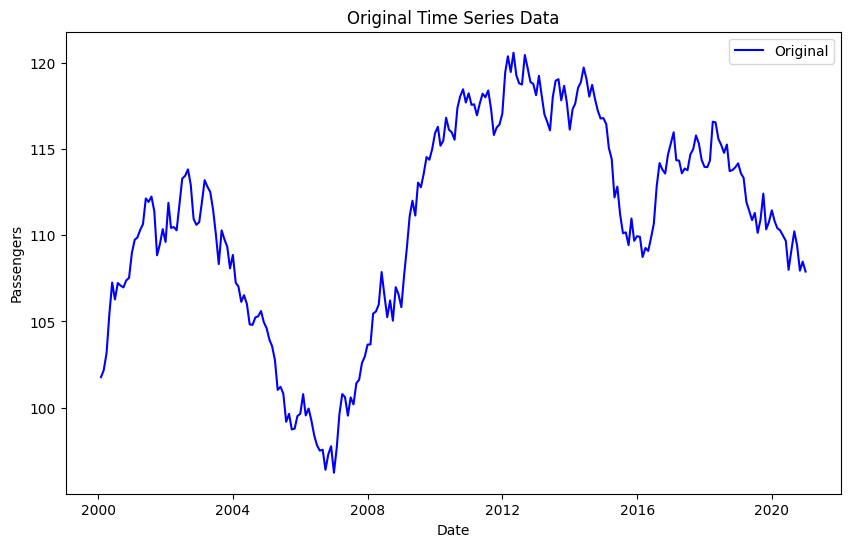

In [21]:
# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label='Original', color="blue")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Original Time Series Data')
plt.legend(loc='best')
plt.show()

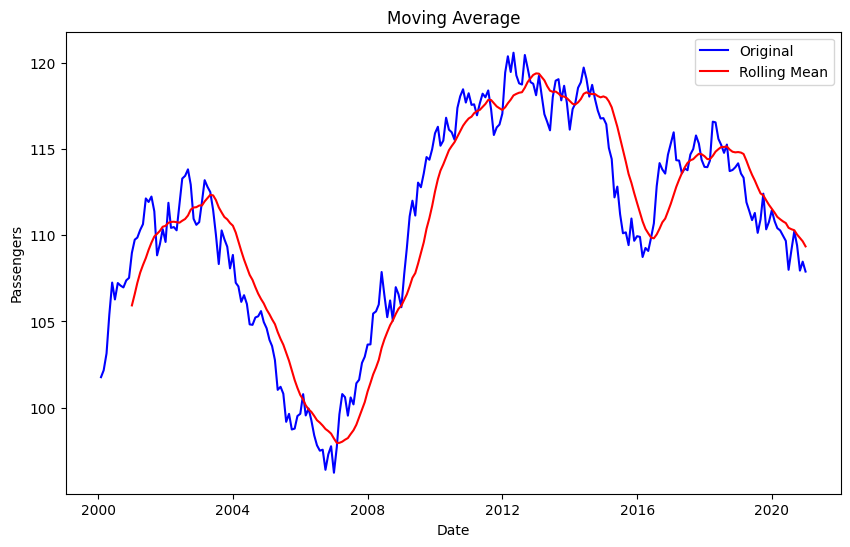

In [22]:
# Moving Average
window_size = 12
rolling_mean = df['Passengers'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label='Original', color="blue")
plt.plot(rolling_mean, label='Rolling Mean', color="red")
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Moving Average')
plt.legend(loc='best')
plt.show()

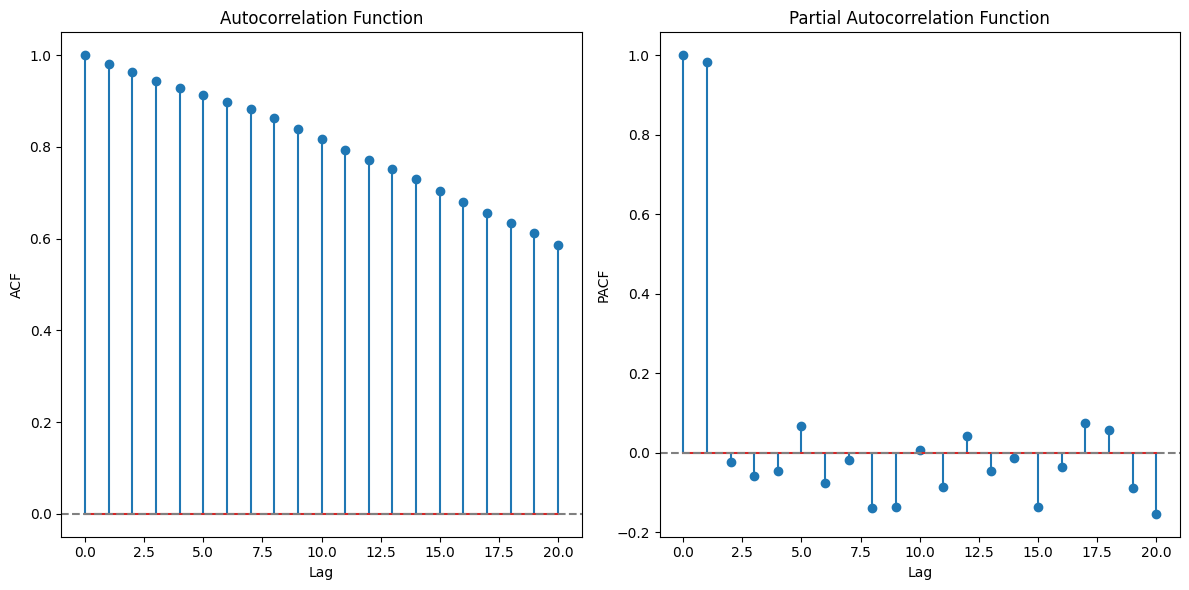

In [23]:
# ACF and PACF
lag_acf = acf(df['Passengers'], nlags=20)
lag_pacf = pacf(df['Passengers'], nlags=20, method='ols')

plt.figure(figsize=(12, 6))
# ACF
plt.subplot(121)
plt.stem(range(21), lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.stem(range(21), lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

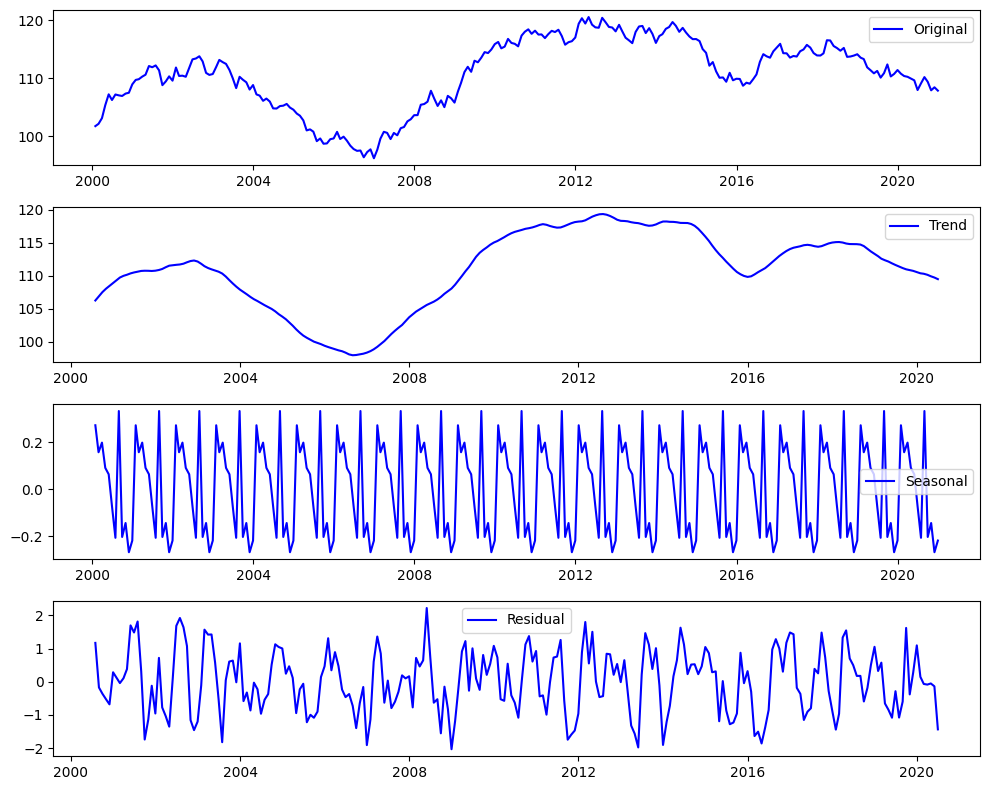

In [24]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color="blue")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color="blue")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color="blue")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color="blue")
plt.legend(loc='best')

plt.tight_layout()
plt.show()